In [1]:
from imports import *
import traces_rdf
%matplotlib inline

Welcome to JupyROOT 6.28/10


In [2]:
withShift = 'data/FastDMC/TriggerShift/iZIP5-TrigShift_00241023_0000.root'
noShift = 'data/FastDMC/TriggerShift/iZIP5-NoShift_00241023_0000.root'
fixShift = 'data/FastDMC/TriggerShift/iZIP5-TrigShift_00241024_0000.root'

# --------------------------------------------------------------------------
# Event Number of Interest
event = 0

In [3]:
file = withShift
# All twelve iZIP5 traces
fig, axes = subplots(3,4,figsize=(9,6), dpi = 1000)
fig.set_tight_layout(True)
chans = traces_rdf.getChannels(file, "TES", event)

for plot in range(8):
    currentAxis = axes.flatten()[plot]
    
    # Get TES trace for plotting
    bins, trace, _,_ = traces_rdf.getTES(file, event, plot)
    currentAxis.plot(bins, trace, lw=1, color = 'C0', label='TESSim Trace')
    
    currentAxis.set_xlim([-500.,3000.])
    currentAxis.set_xlabel("Time [\u03BCs]")
    currentAxis.set_ylabel("Trace [\u03BCA]")
    currentAxis.set_title('SuperSim elog/1884\nTrace for ' + chans[plot] + ' in Event ' + str(event))

for plot in range(4):
    currentAxis = axes.flatten()[plot+8]
    
    # Get TES trace for plotting
    bins, trace, _ = traces_rdf.getFET(file, event, plot)
    currentAxis.plot(bins, trace, lw=1, color = 'C0', label='FETSim Trace')
    
    currentAxis.set_xlim([-500.,1000.])
    currentAxis.set_xlabel("Time [\u03BCs]")
    currentAxis.set_ylabel("Trace [\u03BCA]")
    currentAxis.set_title('SuperSim elog/1884\nTrace for ' + chans[plot])
    
fig.savefig("iZIP5_TrigShift-tile.png")

In [15]:
def bestI0(trace):
    """Compute 'adaptive I0' for trace, scanning the supposed pre-trigger
       baseline for the range of values with the smallest RMS.  This
       should exclude the region where the real trace starts.  Returns
       computed I0 value, along with index of average and RMS value."""
    start = 5                   # Need some bins to compute RMS

    rms = [np.std(trace[:i],ddof=1) for i in range(start,len(trace))]
    eom = [np.std(trace[:i])/sqrt(i) for i in range(start,len(trace))]
    ibest = eom.index(min(eom))+start

    return np.mean(trace[:ibest]), ibest, eom[ibest]

In [17]:
def overlayTraces(thePlot, file, sensor, event):
    """Extract traces for all channels (see getPlottableTraces), and put
       them on the specified plot ("currentAxis" from matplotlib) as
       colored overlay."""
    chans, bins, traces = getPlottableTraces(file, sensor, event)
    thePlot.plot(bins, traces, lw=1, label=chans)
    thePlot.set_xlim([-500., 3000. if sensor=="TES" else 1000.])
    thePlot.set_xlabel("Time [\u03BCs]")
    thePlot.set_ylabel("Trace [\u03BCA]")
    thePlot.set_title(f"SuperSim elog/1884 {sensor} Traces")
    thePlot.legend()
    return

In [11]:
def overlayPlots(file, name):
    """Make a two-panel figure, named 'iZIP5_{name}.png', with
       overlays of the TES traces on one side, and FET traces on
       the other side."""
    fig, axes = subplots(1,2,figsize=(9,4), dpi = 300)
    fig.set_tight_layout(True)
    overlayTraces(axes.flatten()[0], file, "TES", event)
    overlayTraces(axes.flatten()[1], file, "FET", event)

    fig.savefig(f"iZIP5_{name}.png")
    return

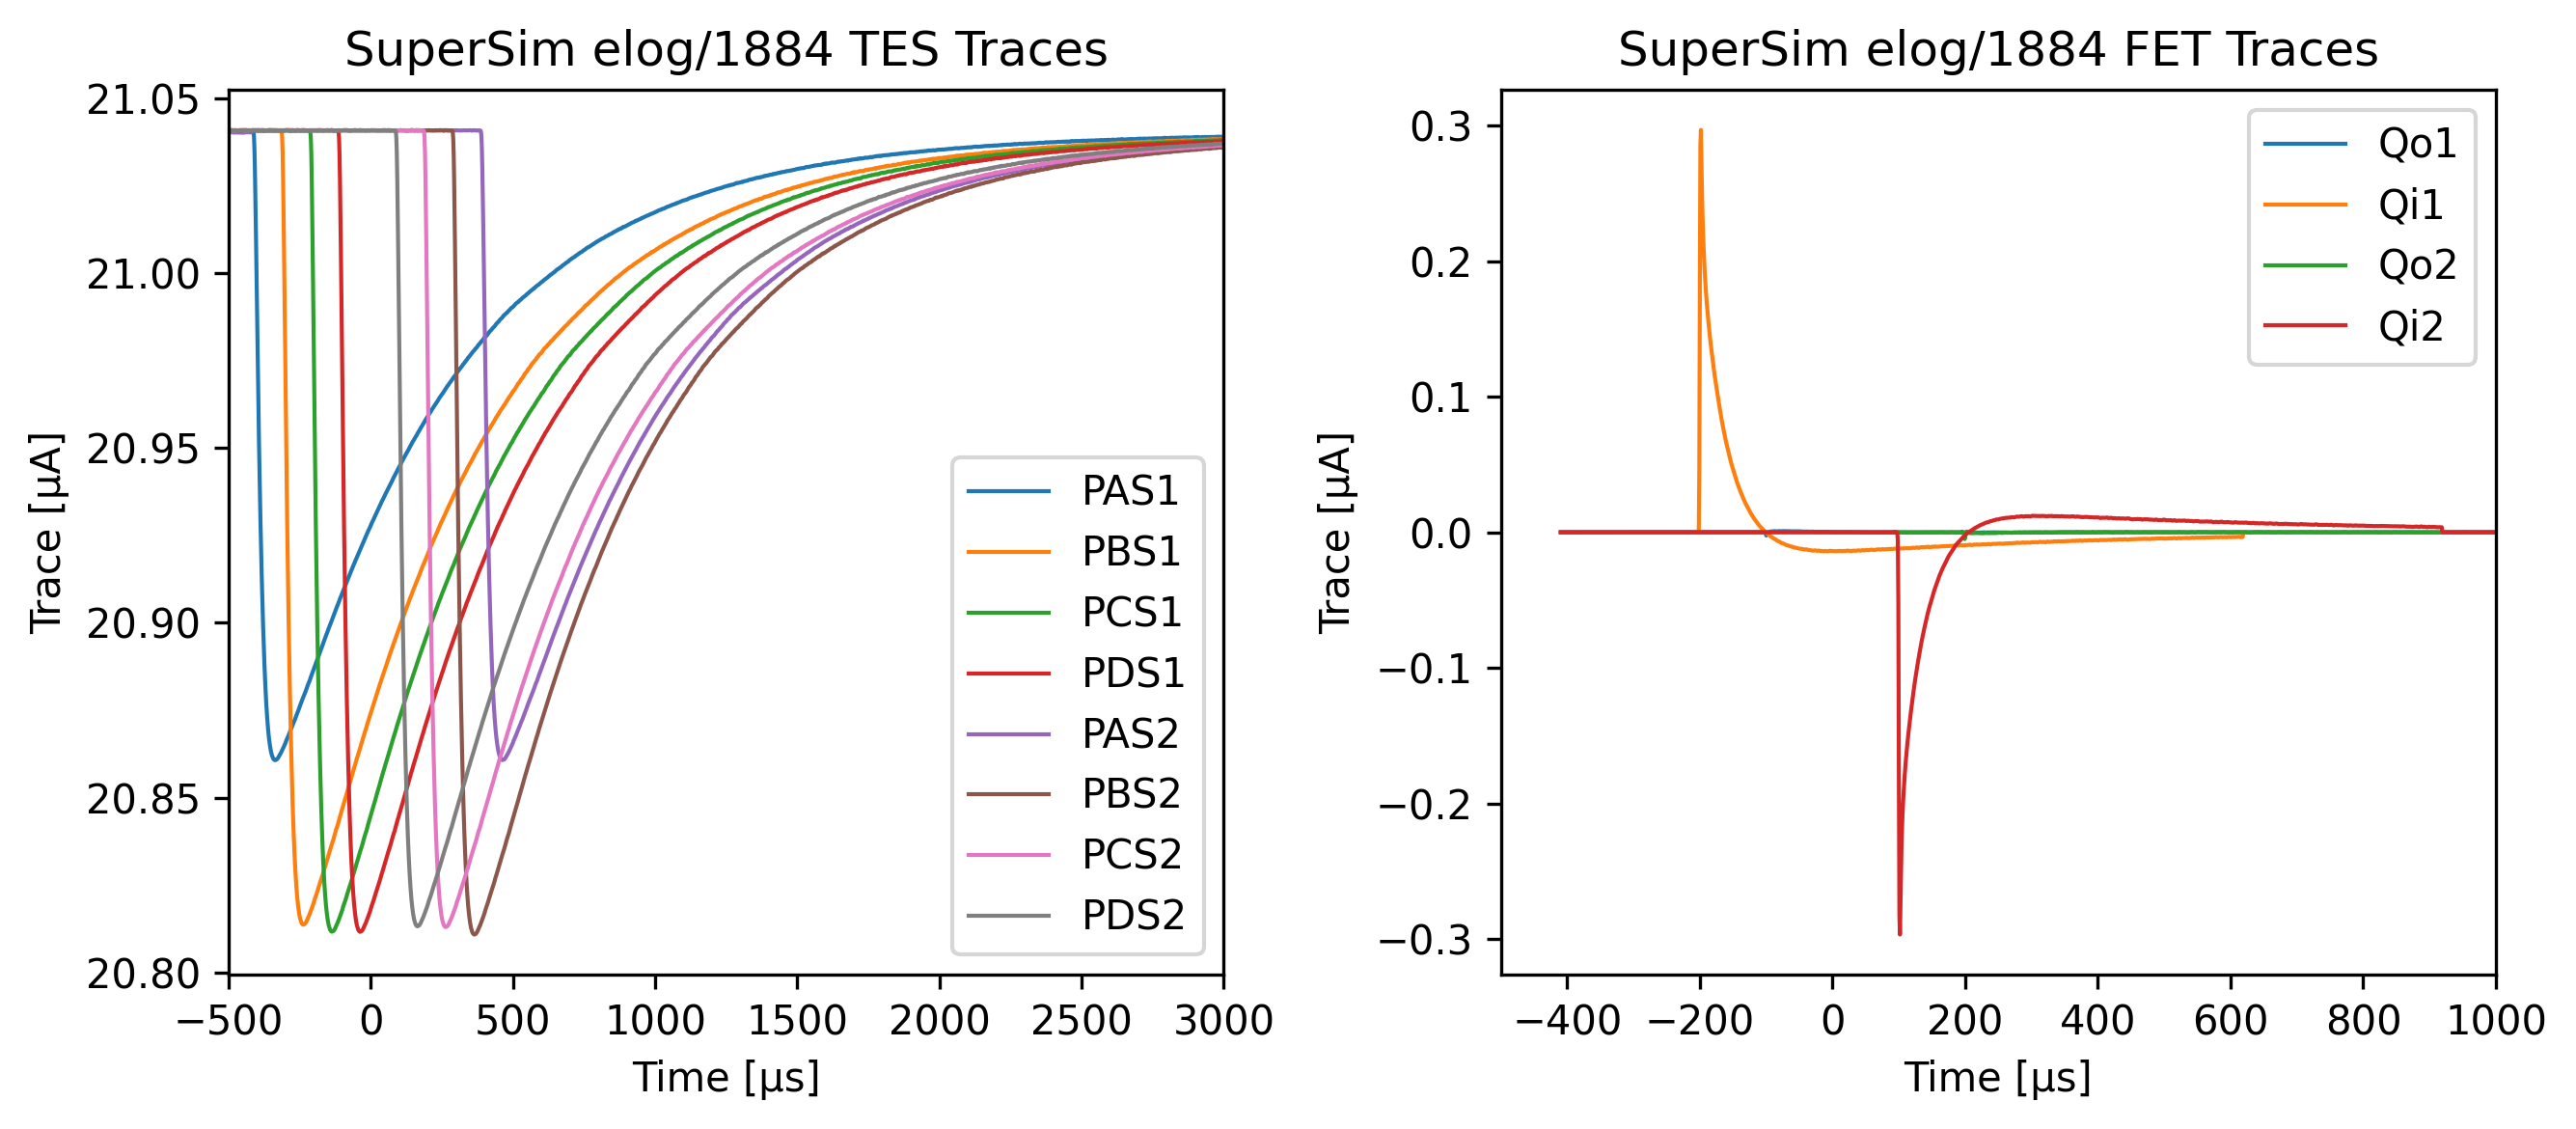

In [6]:
overlayPlots(withShift, "TrigShift")

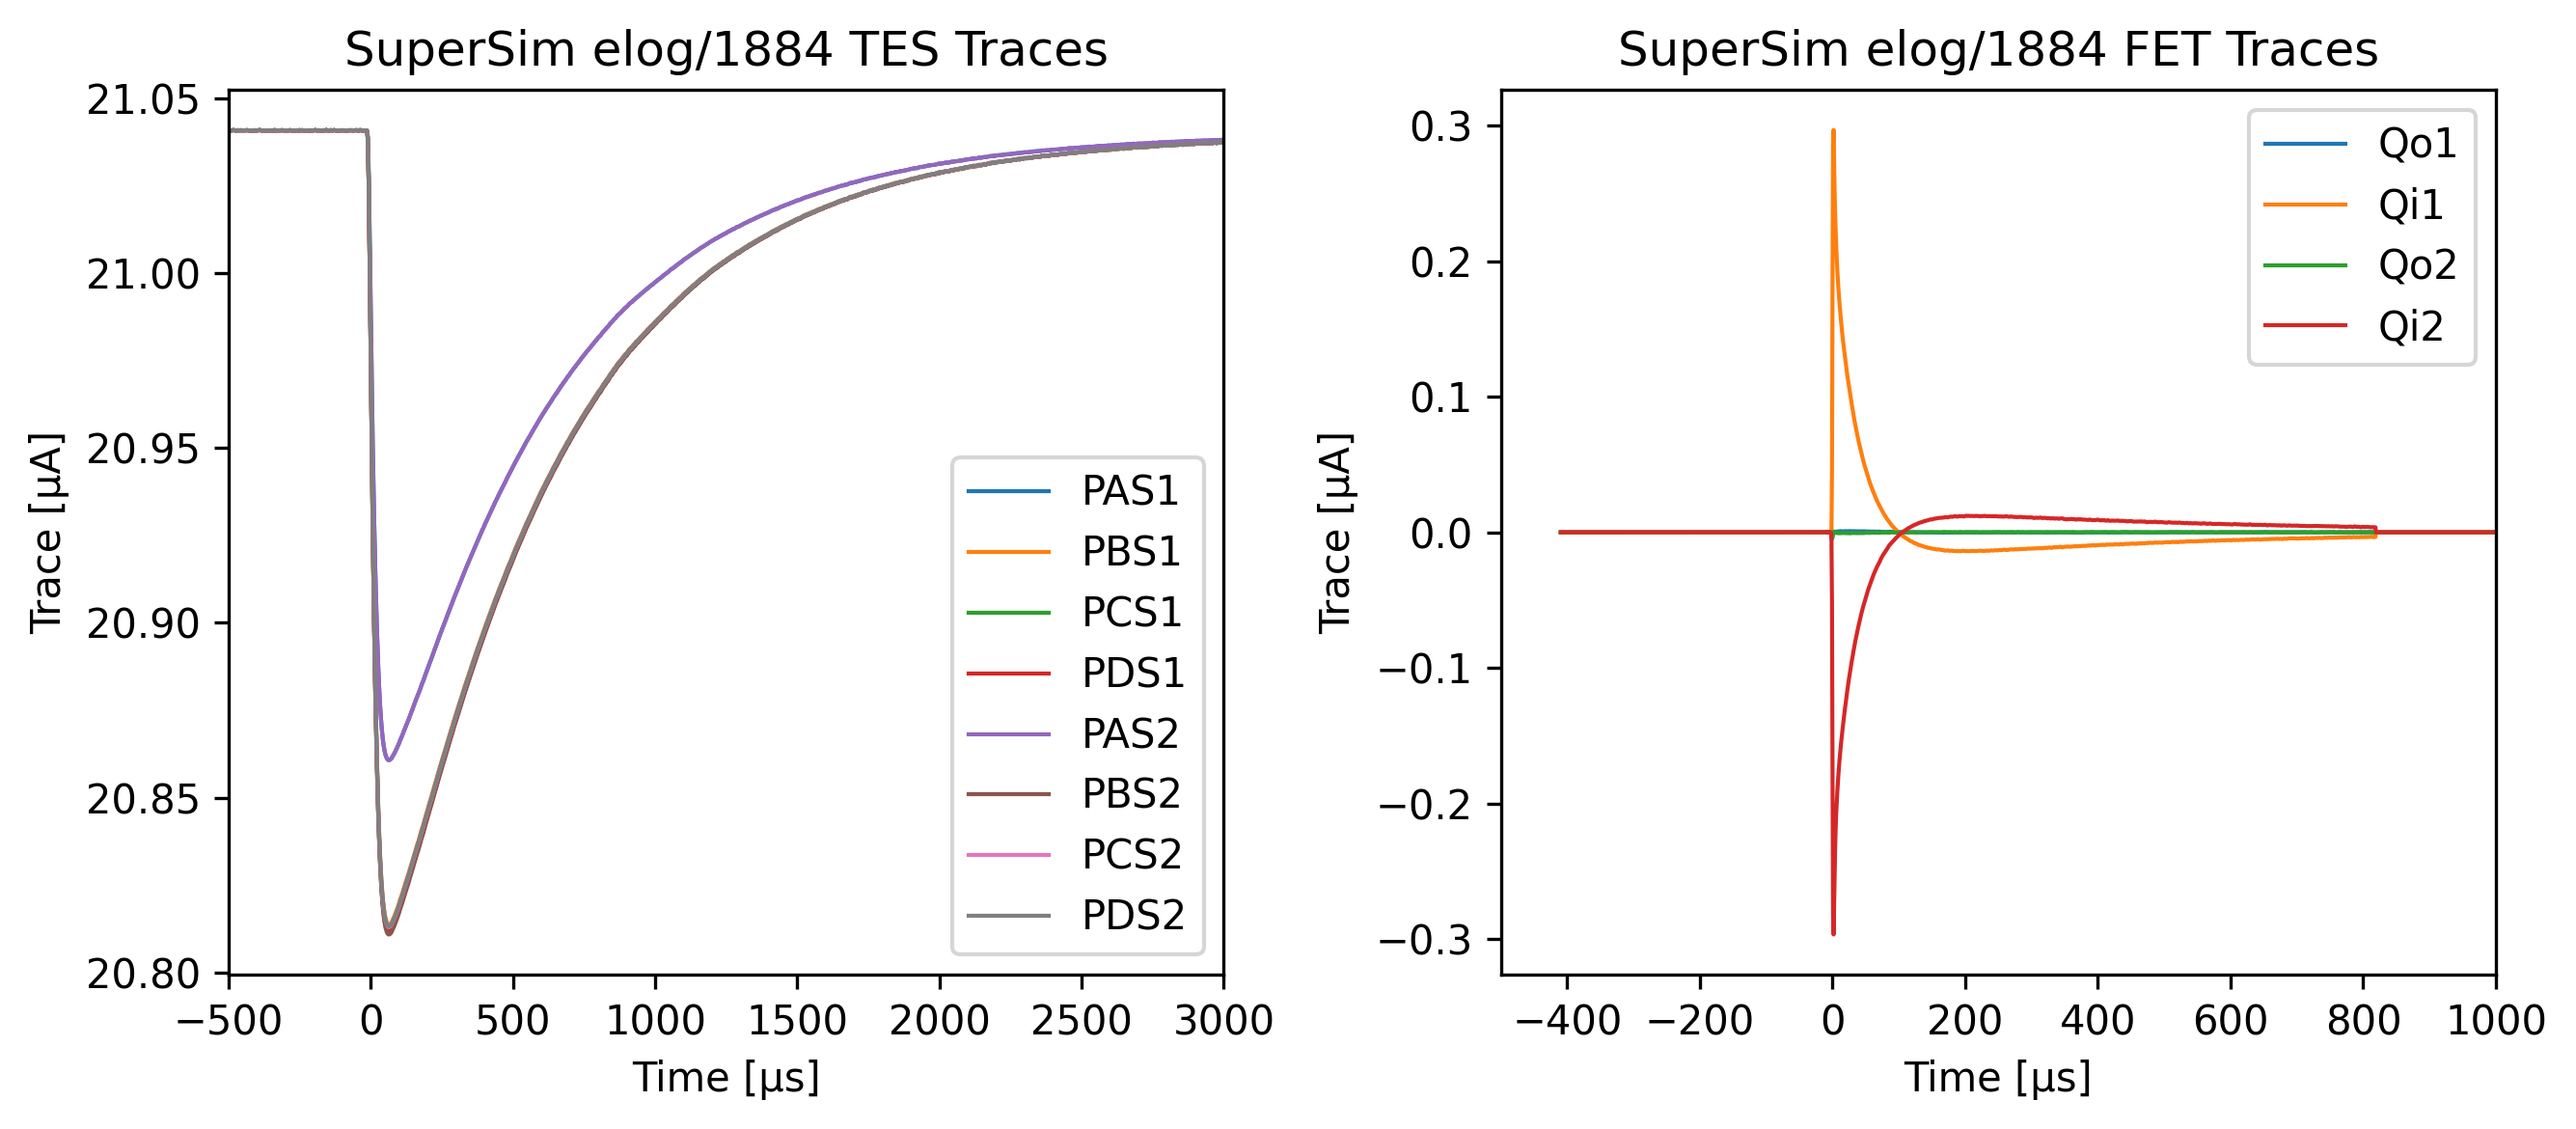

In [7]:
overlayPlots(noShift, "NoShift")

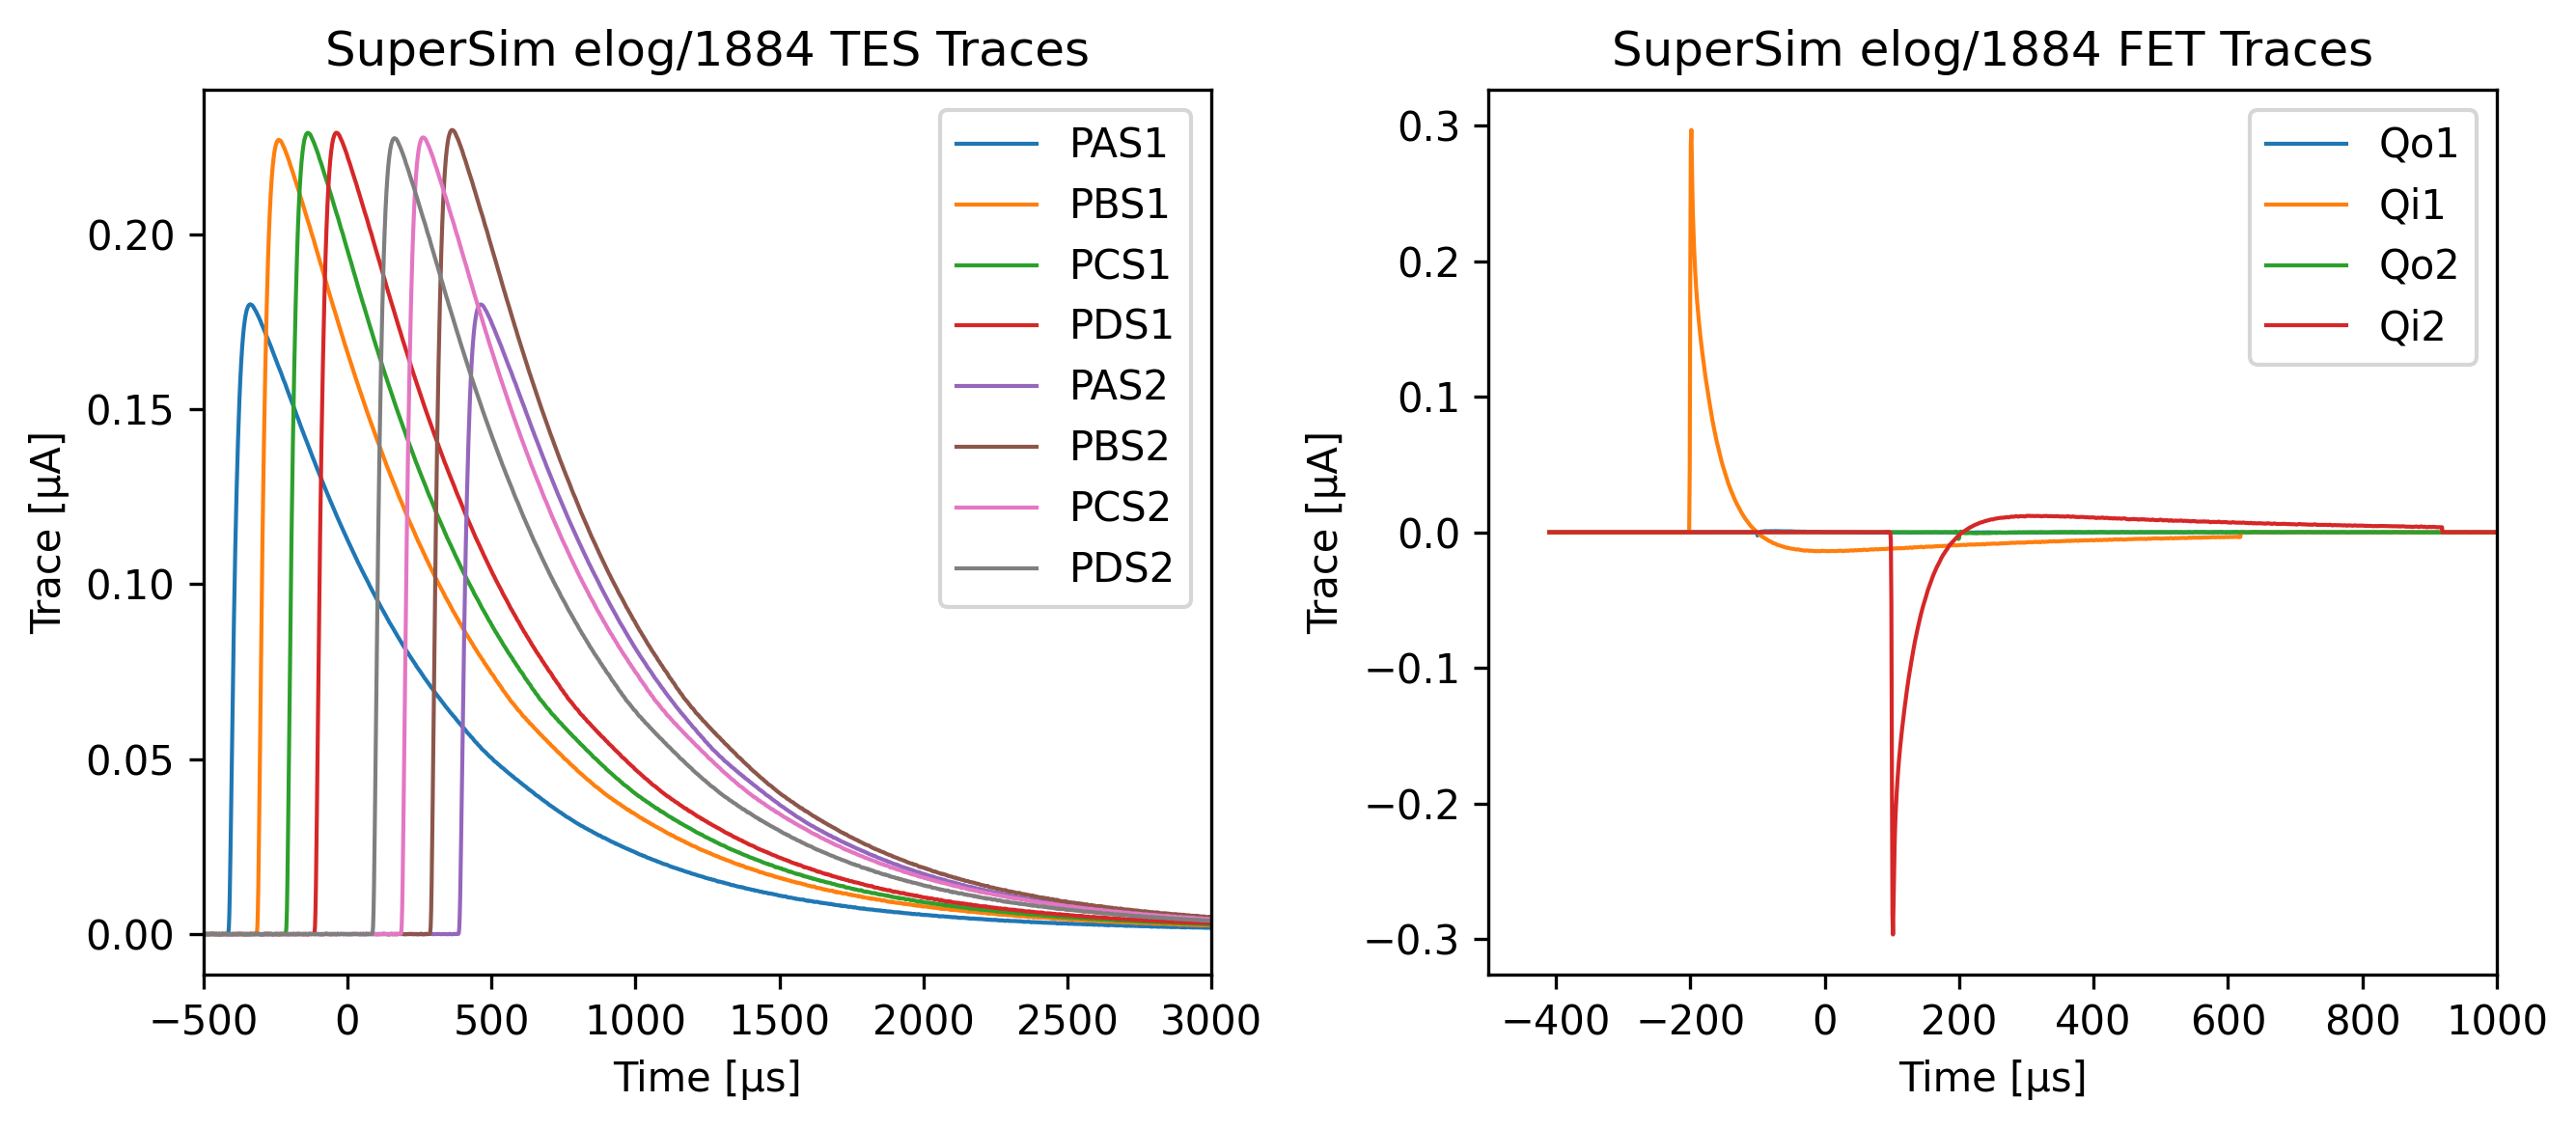

In [18]:
overlayPlots(fixShift, "TrigShift-fixed")